## 简单的两层神经网络

- 目标 了解神经网络的反向传播

In [51]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# 数据


def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m,D)) # 数据矩阵
    Y = np.zeros((m, ), dtype='uint8') # 标签维度
    a = 4 
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    #X = X.T
    #Y = Y.T

    return X, Y

In [60]:
X, y = create_dataset()

X.shape, y.shape

((400, 2), (400,))

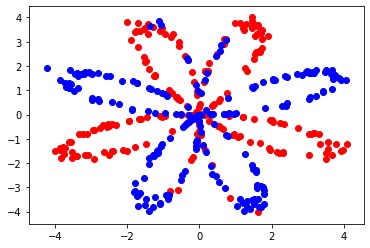

In [62]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

定义网络结构（指定输出层、隐藏层、输出层的大小）

初始化模型参数

循环操作：执行前向传播/计算损失/执行后向传播/权值更新

In [63]:
def layer_sizes(X, Y):
    n_x = X.shape[1] # 输入层神经元个数 每个输入神经元表示一个特征向量
    n_h = 4 # 隐藏层神经元个数
    n_y = Y.shape[1] # 输出层神经元个数
    
    return n_x, n_h, n_y


In [64]:
# 模型参数初始化,定义每一层的权重和偏置

def  initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01 # n_h x n_x
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters



In [65]:
n_x, n_h, n_y = layer_sizes(X, Y)

parameters = initialize_parameters(n_x, n_h, n_y)

parameters

{'W1': array([[ 0.00814343,  0.0078047 ],
        [-0.01464054, -0.00154491],
        [-0.00092432, -0.00237875],
        [-0.00755663,  0.01851438]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[ 0.00209097,  0.01555016, -0.00569149, -0.01061797]]), 'b2': array([[0.]])}

In [112]:
# 前向传播

def sigmoid(X):
    return 1/(1+np.exp(-X))


def forward(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache
    
    

In [113]:
A2, cache = forward(X, parameters)

cache["Z1"].shape, cache["A1"].shape, cache["Z2"].shape, cache["A2"].shape, 

((4, 400), (4, 400), (1, 400), (1, 400))

In [114]:
# 定义交叉商损失函数

def  compute_cost(A2, Y, parameters):
    m = Y.shape[0] # 这里有400个数据
    
    A2 = A2.T
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1/m*np.sum(logprobs)
    
    cost = np.squeeze(cost)
    
    return cost

    

In [115]:
compute_cost(cache["A2"], Y, parameters)

0.6931125167719424

In [110]:
# 反向传播

def  backward(X, Y, parameters, cache):
    
    m = X.shape[1] # 样本数据
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # 推导链式求导 这里推导有问题。  
    
    dZ2 =(A2 - Y.T)*A2*(1-A2) # 预测与真实值之差
    
    dW2 = np.sum(dZ2*A1, axis=1)/m
    db2 = np.sum(dZ2, axis=1)/m
    
    dW1 = dZ2*W2
    
    print(dW2)
    print(db2)

#     dW2 = 1/m * np.dot(dZ2, A1.T)
#     db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
#     dZ1 = np.dot(W2.T, dZ2)*(1-A1**2)
#     dW1 = 1/m * np.dot(dZ1, X)
#     db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
#     grads = {
#         "dW1": dW1,
#         "dW2": dW2,
#         "db1": db1,
#         "db2": db2
#     }
#     return grads
    

In [111]:
backward(X, Y, parameters, cache)

[ 0.06755899  0.0013689  -0.02235576  0.19040044]
[-9.57334084e-05]


In [86]:
# 权重更新

def update_weights(parameters, grads, lr=0.01):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 -= lr*dW1
    b1 -= lr*db1
    
    W2 -= lr*dW2
    b2 -= lr*db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [87]:
# 模型训练

def train(X, Y, iters, lr=0.01):
    np.random.seed(0)
    
    n_x, n_h, n_y = layer_sizes(X, Y)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(iters):
        # 前向传播
        A2, cache = forward(X, parameters)
        
        # 计算损失函数
        cost = compute_cost(A2, Y, parameters)
        
        # 后向传播 计算每一层的权重梯度
        grads = backward(X, Y, parameters, cache)
        
        # 更新每一层的权重
        parameters = update_weights(parameters, grads, lr)
        
        if i % 100 == 0:
            print("cost after iteration %i, %f" % (i, cost))
            
    return parameters

In [88]:
parameters = train(X, Y, 100000)

ValueError: shapes (1,400) and (4,400) not aligned: 400 (dim 1) != 4 (dim 0)

In [39]:
def predict(parameters, X):
    A2, cache = forward(X, parameters)
    prediction = (A2>0.5)
    return prediction


In [41]:
prediction = predict(parameters, X)

prediction.shape

(1, 400)

In [45]:
prediction.astype(np.uint8)

array([[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [44]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [46]:
# 准确率
diff = Y-prediction

accurate = len(np.where(diff==0)[0])/Y.shape[1]*100

accurate


91.5

In [47]:
parameters

{'W1': array([[  0.20810171,  -8.87056496],
        [ 26.6020272 ,  30.52556258],
        [ 22.42398709,  -6.32586145],
        [ 10.68721433, -11.86447203]]), 'b1': array([[-0.00564016],
        [-0.12849882],
        [ 1.20047811],
        [ 0.0414265 ]]), 'W2': array([[-25.83479027, -12.52770994,  -6.03611677,  20.55219694]]), 'b2': array([[-0.05109199]])}

In [49]:
from sklearn.metrics import accuracy_score

Y = Y.reshape((-1,))
prediction = prediction.reshape((-1,))

In [50]:
accuracy_score(prediction, Y)

0.915